<a href="https://colab.research.google.com/github/BrianChegeGichau/movierecommendationsystem/blob/main/movierecommendationsystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Recommendation System

Am tasked to build a movie recommender system using Python libraries such as SurPrise or FastFM.

## 1.0 Understanding the problem

Recommendation systems are a type of information filtering systems as they improve quality of search results and provides items that are more relevant to the search item or are related to the search history of the user. They are used to predict the rating or preference that a user would give to an item.

### Types of recommender systems



*   **Demographic filtering** - They offer generalized recommendations to every user based on the movie popularity/genre. This approach is however considered too simple since the basic idea of this approach is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.
*   **Content-based filering** - This approach suggests similar items based on a particular item. This means that if a person liked a particular item, he or she will also like an item similar to it.
*  **Collaborative filtering** - This system matches persons with similar interests and provides recommendations based on this matching.
*  **Hybrid filtering** - This approach combines both collaborative filtering and content based filering which in some cases provides more accurate recommendations than pure approaches.



## 2.0 Business Understanding

The data sourced was for The Movie Database. TMDb make it easier for users to search movies by typing the keyword of the movie, the name of the director, name of the actor or th movie's name. It also helps to inform the user about popular movies. It has helps a great deal in simplifying existing sites like IMDB and Rotten Tomatoes.

### 2.1. Main Objective
The main objective of this project is to create an efficient movie recommendation system and evaluate its performance. These two form a guide to ensure that we have met our objective.


*   Fit the SurPrise (Simple Python Recommendation System Engine) algorithm to our data and find optimal parameters for this model.
*   Challenge the solution with an efficient algorithm



### 2.2. Metrics for success
The following are factors that will be determining the success of this project:


*   Provide recommendations based on the appropriateness of solving the given problem.
*   Evaluation of the models.



### 2.3. The Experimental Design

The following are the steps that I will take during this study:


1.   Reading and exploring the dataset.
2.   Data Understanding
3.   Data Preparation
4.   Data Exploration
5.   Fitting our data into the Surprise.
6.   Challenge the solution.
7.   Provide recommendations based on the analysis.
8.   Challenging the solution by providing insights on how to make model improvements.



## 3.0 Reading and exploring the dataset

In [ ]:
#Importing the neccessary libraries to read the data
import pandas as pd
from google.colab import drive
#Mounting the google drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Reading the dataset that contains information about the movie.
df1 = pd.read_csv("/content/drive/My Drive/tmdb/tmdb_5000_credits.csv.zip")
#Viewing the first two rows in the dataset
df1.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [ ]:
#Reading the dataset that contains more information about the movie.
df2 = pd.read_csv("/content/drive/My Drive/tmdb/tmdb_5000_movies.csv.zip")
#Viewing the first two rows of the dataset
df2.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


### External Source Validation

The data was sourced from Kaggle. Kaggle is an online plaform and a subsidiary of Google LLC that allows users to find and publish datasets. It contains data from The Movie database (TMDb) which is a popular community user editable database for movies and TV shows used in over 180 countries. Much of its data has been added by the community with over 200,000 developers and companies using the plaform therefore it is a premiere source for metadata.

## 4.0 Data Understanding






In [ ]:
#Finding out the shape of our dataset
print('The first dataset has ', df1.shape[1], 'columns and ', df1.shape[0], 'rows.')

The first dataset has  4 columns and  4803 rows.


In [ ]:
#Finding out the shape of our dataset
print('The second dataset has ', df2.shape[1], 'columns and ', df2.shape[0], 'rows.')

The second dataset has  20 columns and  4803 rows.


1.   The first dataset had four columns which are:


*   Movie_id : This is the unique identifier for each movie.
*   Cast : The names of the lead and supporting actors.
*   Crew : The names of the Director, Editor, Composer, Actor.
*   Title : The name of the Movie.


2.   The second dataset had 20 columns which are:


*   Budget : The budget in which the movie was made.
*   Genre : This column shows the Genre of the movie; Action, Thriller, Comedy.
*   Homepage : This column gives the link to the homepage of the movie.
*   Id : This is the id; also in the first dataset.
*   Keywords : The tags related to the movie.
*   Original language : The language in which the movie was made.
*   Original_Title : The title of the movie before translation or adaption.
*   Overview : A brief decsription of the Movie.
*   Popularity : A numeric quantity specifying the movie popularity.
*   Production_Companies : The production house of the company.
*   Production_Country : The counry in which it was produced.
*   Release Date : The date in which it was released.
*   Revenue : The worldwide revenue generated by the Movie.
*   Runtime : The running time of the movie in minutes.
*   Status : Whether the movie was released or rumoured.
*   Tagline : The Movies tagline.
*   Title : The title of the Movie.
*   Vote_average : Average ratings the movie received.
*   Vote_count : The count of votes received.




## 5.0 Data Preparation

We are going to merge the two datasets to form one huge dataset. We shall merge them using the Movie_Id column. For this case, we shall have to rename the first dataset movie_id to id.

In [ ]:
#Renaming the movie_id to id
df1 = df1.rename(columns = {'movie_id':'id'})

We are also going to drop the title column since it appears on both datasets.

In [ ]:
#Dropping the title column in the first dataset
df1 = df1.drop(['title'],axis=1)

In [ ]:
#Merging the two datasets using the id column
df = df1.merge(df2, on='id')
df.head(2)

,id,cast,crew,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [ ]:
#Checking for null values in the dataset
df.isnull().sum()

id                         0
cast                       0
crew                       0
budget                     0
genres                     0
homepage                3091
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

There are a number of columns with missing values and the following are the actions I'll be taking:


*   Both the homepage and the tagline have quite a number of missing values. The tagline might have useful information that can help us recommend but it happens to be unique for each and every movie therefore we wouldn't want to confuse up the model. The homepage and tagline columns will be dropped.
*   There are 3 entries missing in the overview which is also unique for the movies. We will therefore drop the rows missing the overview data.
*   The release date has a missing value which I'll be filling up with the mode.
*   The runtime has two missing values which I will be filling up with the mean of the dataset.




In [ ]:
#Dropping the homepage and tagline columns
df = df.drop(['homepage','tagline'],axis=1)

In [ ]:
#Filling the mean runtime where there are msiing values in the runtime 
df['runtime'].fillna(df['runtime'].mean(),inplace=True)

In [ ]:
#Filling in the mode of release dates in the missing release 
df['release_date'].fillna(df['release_date'].mode(),inplace=True)

In [ ]:
#Drop the rows with missing overview data
df = df.dropna()

In [ ]:
#Confirming if there are any missing values in our dataset
df.isnull().any()

id                      False
cast                    False
crew                    False
budget                  False
genres                  False
keywords                False
original_language       False
original_title          False
overview                False
popularity              False
production_companies    False
production_countries    False
release_date            False
revenue                 False
runtime                 False
spoken_languages        False
status                  False
title                   False
vote_average            False
vote_count              False
dtype: bool

We have succesfully dealt with missing values in our dataset. Bingo!!

## 6.0 Data Exploration

At this point we will be answering key data mining questions that will be of very high importance to the project and the modelling.
We shall be answering the following questions as part of our analysis:


*   What are the most popular Movies and Tv shows on TMDb?
*   Which is the movies received the highest vote count?
*   Which movies received the highest rating?
*   Are the movies with the highest budgets the most popular ones? Or receive the highest rating? 
*   Do movies with the highest budgets have the highest returns?



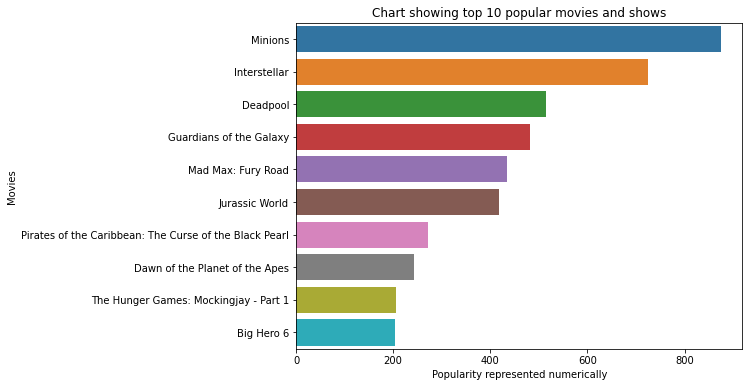

In [ ]:
#Importing the necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
#Sort movies by their popularity
pp = df.sort_values('popularity', ascending=False)
#Setting the figure size
plt.figure(figsize=(8,6))
#Creating a bar plot using seaborn inbuilt barplot
sns.barplot(x=pp['popularity'].head(10), y=pp['title'].head(10), data=pp)
plt.xlabel('Popularity represented numerically')
plt.ylabel('Movies')
plt.title('Chart showing top 10 popular movies and shows')
plt.show()

From the visualization we can order the five most popular movies and Tv shows on TMDb (The Movie database) following the order:


*   Minions
*   Interstellar
*   Deadpool
*   Guardians of the Galaxy
*   Mad Max : Fury Road





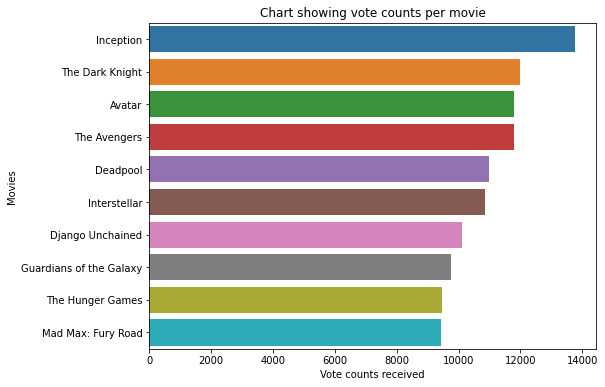

In [ ]:
#Sort movies by their vote counts
vote = df.sort_values('vote_count', ascending=False)
#Setting the figure size
plt.figure(figsize=(8,6))
#Creating a bar plot using seaborn inbuilt barplot
sns.barplot(x=vote['vote_count'].head(10), y=vote['title'].head(10), data=vote)
plt.xlabel('Vote counts received')
plt.ylabel('Movies')
plt.title('Chart showing vote counts per movie')
plt.show()

The following movies and Tv shows received the highest votes after ratings. The top five are:


*   Inception
*   The Dark Knight
*   Avatar
*   The Avengers
*   Deadpool

There are a number of movies and Tv shows which are both popular and had th highest vote counts. It might be the users who watched this had complete satisfaction on the shows and voted for it as well.
The movies are : 


*   Deadpool
*   Interstellar
*   Guardians of the Galaxy
*   Mad Max Fury Road





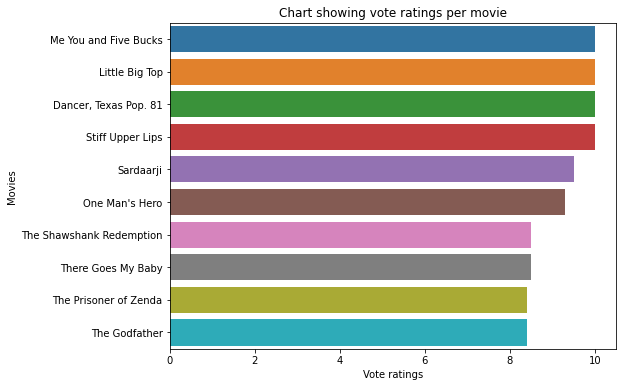

In [ ]:
#Sort movies by their ratings
rating = df.sort_values('vote_average', ascending=False)
#Setting the figure size
plt.figure(figsize=(8,6))
#Creating a bar plot using seaborn inbuilt barplot
sns.barplot(x=rating['vote_average'].head(10), y=rating['title'].head(10), data=rating)
plt.xlabel('Vote ratings')
plt.ylabel('Movies')
plt.title('Chart showing vote ratings per movie')
plt.show()

The movies that received the highest ratings were actually not the most popular ones. Which leads to the question whether there is any relationship between the ratings and the counts. We shall find out.

The movies that had the highest ratings are:


*   Me You and Five Bucks
*   Little Big Top
*   Dancer, Texas, Pop 81
*   Stiff Upper Lips
*   Sardaarji



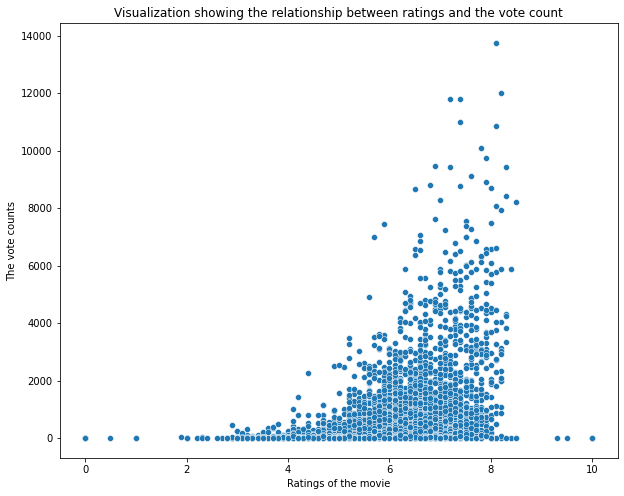

In [ ]:
#Creating a scatter plot to see the relationship between vote counts and their ratings
plt.figure(figsize=(10,8))
sns.scatterplot(data=votes, x="vote_average", y="vote_count")
plt.xlabel("Ratings of the movie")
plt.ylabel("The vote counts")
plt.title("Visualization showing the relationship between ratings and the vote count")
plt.show()

From the visualization above we can inference that movies with very high ratings have really low number of vote counts same as the ones with very low ratings. The movies with ratings between 6 and 8 had very high vote counts and may therefore express better the general feeling of the specific movie by the public.

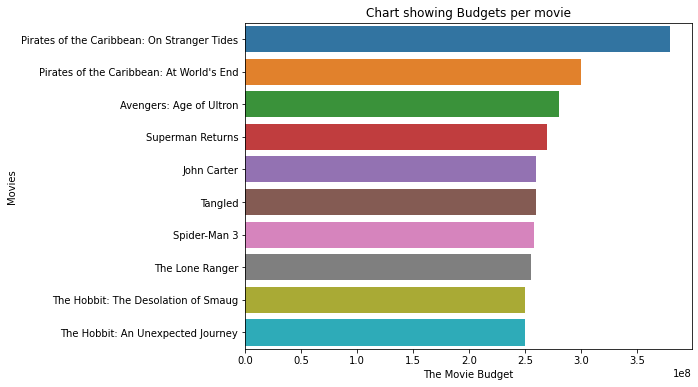

In [ ]:
#Sort movies by their budget
budget = df.sort_values('budget', ascending=False)
#Setting the figure size
plt.figure(figsize=(8,6))
#Creating a bar plot using seaborn inbuilt barplot
sns.barplot(x=budget['budget'].head(10), y=budget['title'].head(10), data=budget)
plt.xlabel('The Movie Budget')
plt.ylabel('Movies')
plt.title('Chart showing Budgets per movie')
plt.show()

The movies with the highest budgets were:

*   Pirates of the Caribbean : On Stranger Tides
*   Pirates of the Carribean : At World's End
*   Avengers : Age of Ultron
*   Superman Returns
*   John Carter



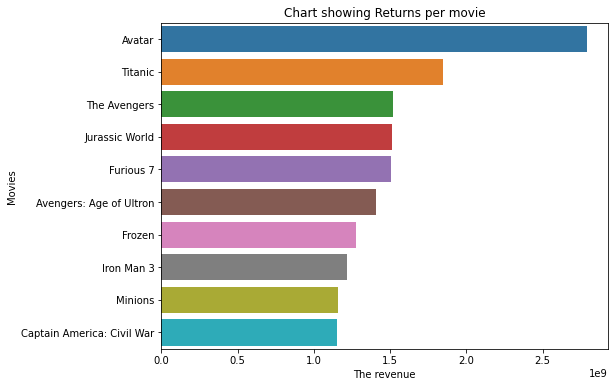

In [ ]:
#Sort movies by their returns
returns = df.sort_values('revenue', ascending=False)
#Setting the figure size
plt.figure(figsize=(8,6))
#Creating a bar plot using seaborn inbuilt barplot
sns.barplot(x=returns['revenue'].head(10), y=returns['title'].head(10), data=returns)
plt.xlabel('The revenue')
plt.ylabel('Movies')
plt.title('Chart showing Returns per movie')
plt.show()

There are a number of inferences from the above analysis.
Avatar: Age of Ultrons had a good return which also had a high budget. Minions was quite popular and also had good returns. The Jurassic world was also quite a popular movie and also had high returns.Avatar had a high vote count and also had high retruns.

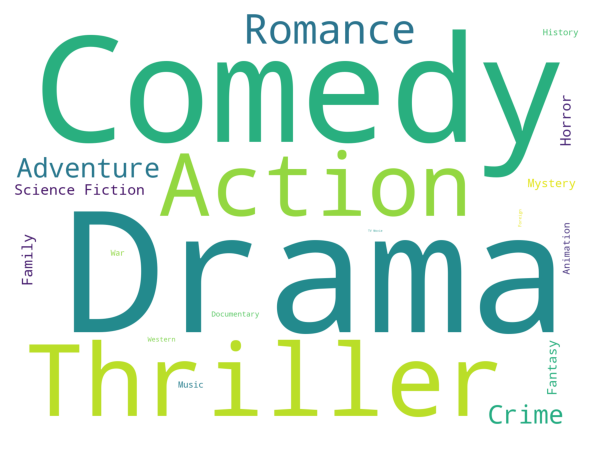

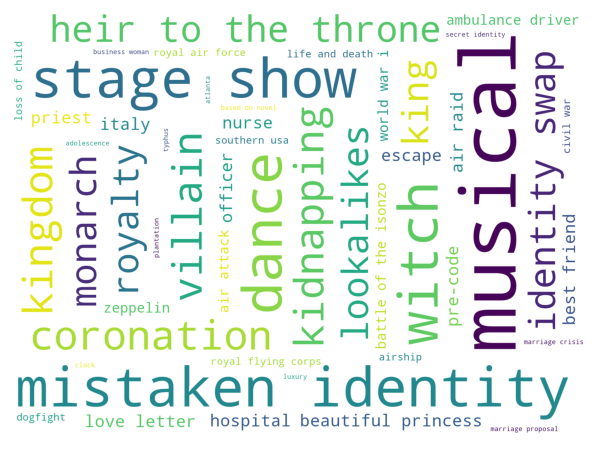

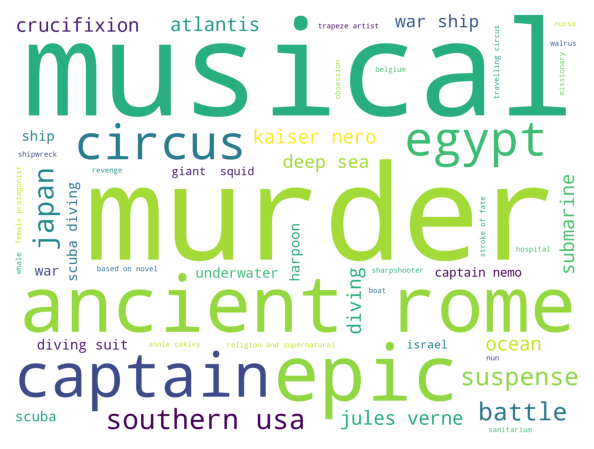

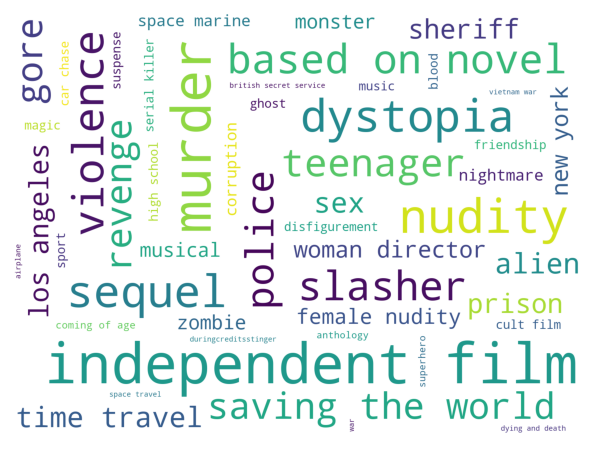

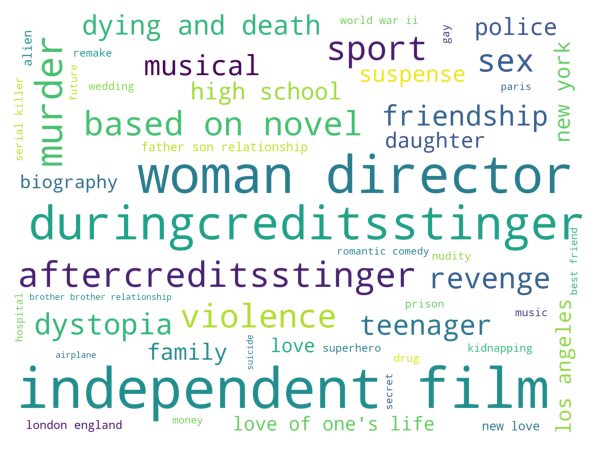

In [ ]:
# wordcloud of genres and keywords
# Creating a show popular genres and keywords
def multi_wordcloud(series,filename):
    w=wc.WordCloud(background_color="white",margin=20,width=800,height=600,prefer_horizontal=0.7,max_words=50,scale=2)
    count=multi_count(series,"name")
    w.generate_from_frequencies(count)
    if saving:w.to_file(filename)
    f, ax = plt.subplots(figsize=(16, 8))
    plt.axis('off')
    plt.imshow(w)
    plt.show()
#Displaying the wordcloud images
multi_wordcloud(df.genres,filename="wordcloud_genres.png")
multi_wordcloud(df.keywords[df.release_date.apply(lambda x:int(x[:4])//10*10)==1930],filename="wordcloud_keywords_1930.png")
multi_wordcloud(df.keywords[df.release_date.apply(lambda x:int(x[:4])//10*10)==1950],filename="wordcloud_keywords_1950.png")
multi_wordcloud(df.keywords[df.release_date.apply(lambda x:int(x[:4])//10*10)==1980],filename="wordcloud_keywords_1980.png")
multi_wordcloud(df.keywords[df.release_date.apply(lambda x:int(x[:4])//10*10)==2000],filename="wordcloud_keywords_2000.png")

## 7.0 Building the Recommender System

### SurPrise Algorithm ( Simple Python Recommendation System Engine )

This is a Python SciKit for building and analyzing recommender systems that deal with explicit rating data. SurPrise uses a technique called Collaborative Filtering to make recommendations to Movie Watchers. In this analysis we will be using the user's metadata to do Item Based Collaborative Filtering which was also provided. This method simply recommends items based on their similarity with the items that the target user rate. The similarity is computed with Pearson Correlation or Cosine Similarity. One thing about the Collaborative Filtering method is that it doesn't care what the movie is (or what it contains). It works solely on the basis of an assigned Movie ID and tries to predict ratings based on how other users have predicted the movie.

In [ ]:
#Installing the surprise package to our notebook
!pip install scikit-surprise

In [ ]:
#Importing necessary librries for the analysis
from surprise import SVD, KNNBasic
from surprise import Dataset
from surprise.model_selection import cross_validate

In [ ]:
#Installing SurPrise package tools 
from surprise import Reader, Dataset, SVD, NMF, NormalPredictor, KNNBasic, KNNWithMeans, KNNWithZScore
reader = Reader()

In [ ]:
#Importing User ID metadata
ratings = pd.read_csv("/content/drive/My Drive/movierecommendation/ratings_small.csv.zip")
ratings.head(2)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179


In [ ]:
#Reading the data into the reader
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [ ]:
#Fitting our data into the SurPrise algorithms
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), NMF(), NormalPredictor(), KNNBasic(), KNNWithMeans(), KNNWithZScore()]:
  results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
  tmp = pd.DataFrame.from_dict(results).mean(axis=0)
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]],index=['Algorithm']))
  print(tmp)

test_rmse    0.904327
fit_time      3.27876
test_time    0.191915
Algorithm         SVD
dtype: object
test_rmse    0.959361
fit_time      3.60279
test_time    0.182416
Algorithm         NMF
dtype: object
test_rmse            1.43746
fit_time            0.078335
test_time           0.229141
Algorithm    NormalPredictor
dtype: object
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
test_rmse     0.979089
fit_time     0.0746127
test_time      1.84622
Algorithm     KNNBasic
dtype: object
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
test_rmse        0.927367
fit_time        0.0917481
test_time         1.99741
Algorithm    KNNWithMeans
dtype: object
Comp

The SVD algorithm performed best with the least RMSE at 0.9 which is rather low. RMSE is a metric used to assess the accuracy of our model. It is the standard deviation of the prediction errors.

We will use the SVD algorithm to predict some of our users preferences and ratings.

In [ ]:
#Defining the SVD algorithm
algorithm = SVD()

In [ ]:
#Building a trainset and fitting our data on the SVD  algorithm
trainset = data.build_full_trainset()
algorithm.fit(trainset)

In [ ]:
#Checking the movie ratings by user id 1
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [ ]:
#Predicting the movie rating for user 1 and movie ID 3671
algorithm.predict(1, 3671)

Prediction(uid=1, iid=3671, r_ui=None, est=2.9599166363607936, details={'was_impossible': False})

Our algorithm predicts the user is likely to give a 2.96 rating to the 3671 Movie ID. Though the real data says that the user gave a 3.0 rating the algorithm was not badly off.

Using the SurPrise algorithm only exposed us to collaborative filtering, I will be challenging the solution with content based filtering. Using the movie content, casts, directors, overview to find recommendations of movies 

### 7.1 Challenging the Solution

#### Using the Content based filtering method

This method makes recommendations absed on user preferences for the movies descriptions. That means this system uses the content of the movie (overview, cast, crew, keyword) to find its similarity with other movies then a list of similar movies are recommended.

#### 7.1.1 Using the plot description to make a Recommendation

I will compute pairwise sismilarity scores for all movies based on the plot decsription and a recommendation will be made based on that similarity score. The plot description is given as overview in our dataset.

First we will need to convert the word vector of each and every word in the overview by computing the Term Frequency Inverse Document Frequency. This will give us a matrix where each column represents a word in the overview vocabulary and each row represents a movie. WE are doing this as text pre processing to reduce the importance of words that occur frequently in plot overviews and therefore their significance in computing the final similarity score.

In [ ]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['overview'] = df['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4799, 20977)

There are over 20000 words that explain the 4,799 movies in our dataset.

We shall be using the cosine similarity to calculate a numeric quantity that shows the similarity between two movies. We will be using the cosine similiarity since it is independent of magnitude and relatively easy and fast to calculate.

We shall be using the sklearn's linear kernel since we already have the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score.

In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

We shall need to identify a movie title using it's index therefore we shall do some reverse mapping.

In [ ]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

We will be defining a function that takes a movie title as an input and ouputs a list of the 10 most similar movies.


*   First we will get the index of the movie given its title.
*   Second, get the list of cosine similarity scores for that particular movie then convert it into a list of tuples where the first element is it's position anf the second is the similarity score.
*   Sort the list of tuples based on their similarity scores.
*   Get the top 10 elements of this list. The first element is itself so we are going to ignore it.
*   Then return titles corresponding to the indices of the top elements.



In [ ]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [ ]:
#Applying the function to the movie 'The Dark Knight Rises'
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3853    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

#### 7.1.2 Using the Credits, Genres and Keywords

We are first going to use the follwoing metadata: 


*   The Top 3 Actors
*   The Director
*   Related Genres



In [ ]:
# Parsing the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df[feature] = df[feature].apply(literal_eval)

We'll write functions that will help us to extract the required information from each feature.

In [ ]:
#Getting the Directors name if Director's name data is not available return a null value
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [ ]:
# Returns the list top 3 actors 
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [ ]:
# Define new director, cast, genres and keywords features that are in a suitable form.
df['director'] = df['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df[feature] = df[feature].apply(get_list)

In [ ]:
# Print the new features of the first 3 films
df[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


The next step we are going to be making all names and keywords lowercase and stripping all spaces between them. This is done so as not to similarise names such as Mary John and Mary Kate.

In [ ]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [ ]:
# Apply clean_data function to the features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df[feature] = df[feature].apply(clean_data)

We are going to create a kind of soup that contains metadata that we want to feed to our vectorizer that is directors, casts, genres, cast.

In [ ]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df['soup'] = df.apply(create_soup, axis=1)

Here we will be using the Count Vectorizer instead of the TF-IDF, this is because we don't want to down weigh the presence of an actor/actress if he/she has acted or directed in a number of movies.

In [ ]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['soup'])

In [ ]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
# Reset index of our main DataFrame and construct reverse mapping as before
df = df.reset_index()
indices = pd.Series(df.index, index=df['title'])

In [ ]:
#Getting the recommendations using the Credits Genres and Keywords.
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4634    Amidst the Devil's Wings
1196                The Prestige
3072           Romeo Is Bleeding
3325              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

## 8.0 Recommendations 


From the data exploration findings it's apparent that some movies that had really high investments were no where to be seen in popularity or vote counts. The movie management teams should focus a significant amount of energy in learning the general feel from the public using pilot programs, surveys to know what the public itches for.
And also try to work on their marketing strategies.

For the movie recommendation system:

I would suggest we go with the Content Based Filtering method as compared to the SurPrise algorithm. Here are a couple of reasons:


*   It gives out the uniqueness of each an every movie.
*   It's more personalized than the general taste from a similar user.
*   A user is more likely to rate highly a similar movie that they watched before than a different taste from a different user.

